In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from fastai.imports import *

In [5]:
path = Path('./data')
bs = 48

In [6]:
train_df = pd.read_csv(path/'train.csv')

In [7]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
data_lm = (TextList.from_df(train_df, path, cols='question_text')
                .random_split_by_pct(0.1)
                .label_for_lm()           
                .databunch(path='.', bs=bs))


/home/andreas/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py:198: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [ ]:
data_lm.show_batch()

In [ ]:
data_lm.vocab.itos[:10]

In [6]:
data_lm.save('data_lm.pkl')

NameError: name 'data_lm' is not defined

In [7]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


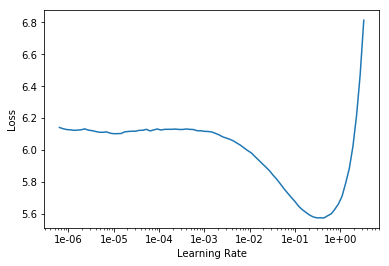

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 